In [34]:
library(ggplot2)
library(dplyr)

# Ex 1

In [35]:
url <- "https://raw.githubusercontent.com/cibelerusso/Gestao-da-qualidade/main/Dados/Cozimento.csv"
dados <- read.csv(url, sep=";")
head(dados)url <- "https://raw.githubusercontent.com/cibelerusso/Gestao-da-qualidade/main/Dados/Cozimento.csv"
dados <- read.csv(url, sep=";")
head(dados)

,Amostra,x1,x2,x3,x4,x5,Xbarra,R
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,"1,32350","1,41280","1,67440","1,45730","1,69140","1,51188","0,36790"
2,2,"1,43140","1,35920","1,60750","1,46660","1,61090","1,49512","0,25170"
3,3,"1,42840","1,48710","1,49320","1,43240","1,56740","1,48170","0,13900"
4,4,"1,50280","1,63520","1,38410","1,28310","1,55070","1,47118","0,35210"
5,5,"1,56040","1,27350","1,52650","1,43630","1,64410","1,48816","0,37060"
6,6,"1,59550","1,54510","1,35740","1,32810","1,41980","1,44918","0,26740"


In [36]:
for (col in colnames(dados)) {
  dados[[col]] <- gsub(",", ".", dados[[col]]) # Substituindo a virgula por ponto, para transformar em nunerico
      dados[[col]] <- as.numeric(dados[[col]])
}

head(dados)

,Amostra,x1,x2,x3,x4,x5,Xbarra,R
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1.3235,1.4128,1.6744,1.4573,1.6914,1.51188,0.3679
2,2,1.4314,1.3592,1.6075,1.4666,1.6109,1.49512,0.2517
3,3,1.4284,1.4871,1.4932,1.4324,1.5674,1.48170,0.1390
4,4,1.5028,1.6352,1.3841,1.2831,1.5507,1.47118,0.3521
5,5,1.5604,1.2735,1.5265,1.4363,1.6441,1.48816,0.3706
6,6,1.5955,1.5451,1.3574,1.3281,1.4198,1.44918,0.2674


In [37]:
# criando um df com os fatores

fatores <- data.frame(
  n = 1:10,
  A2 = c(0, 0, 0.576, 0.729, 0.882, 1.037, 1.203, 1.380, 1.570, 1.773),
  D3 = c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
  D4 = c(3.267, 2.223, 1.86, 1.777, 1.676, 1.588, 1.515, 1.448, 1.396, 1.356)
)

head(fatores)

,n,A2,D3,D4
,<int>,<dbl>,<dbl>,<dbl>
1,1,0.000,0,3.267
2,2,0.000,0,2.223
3,3,0.576,0,1.860
4,4,0.729,0,1.777
5,5,0.882,0,1.676
6,6,1.037,0,1.588


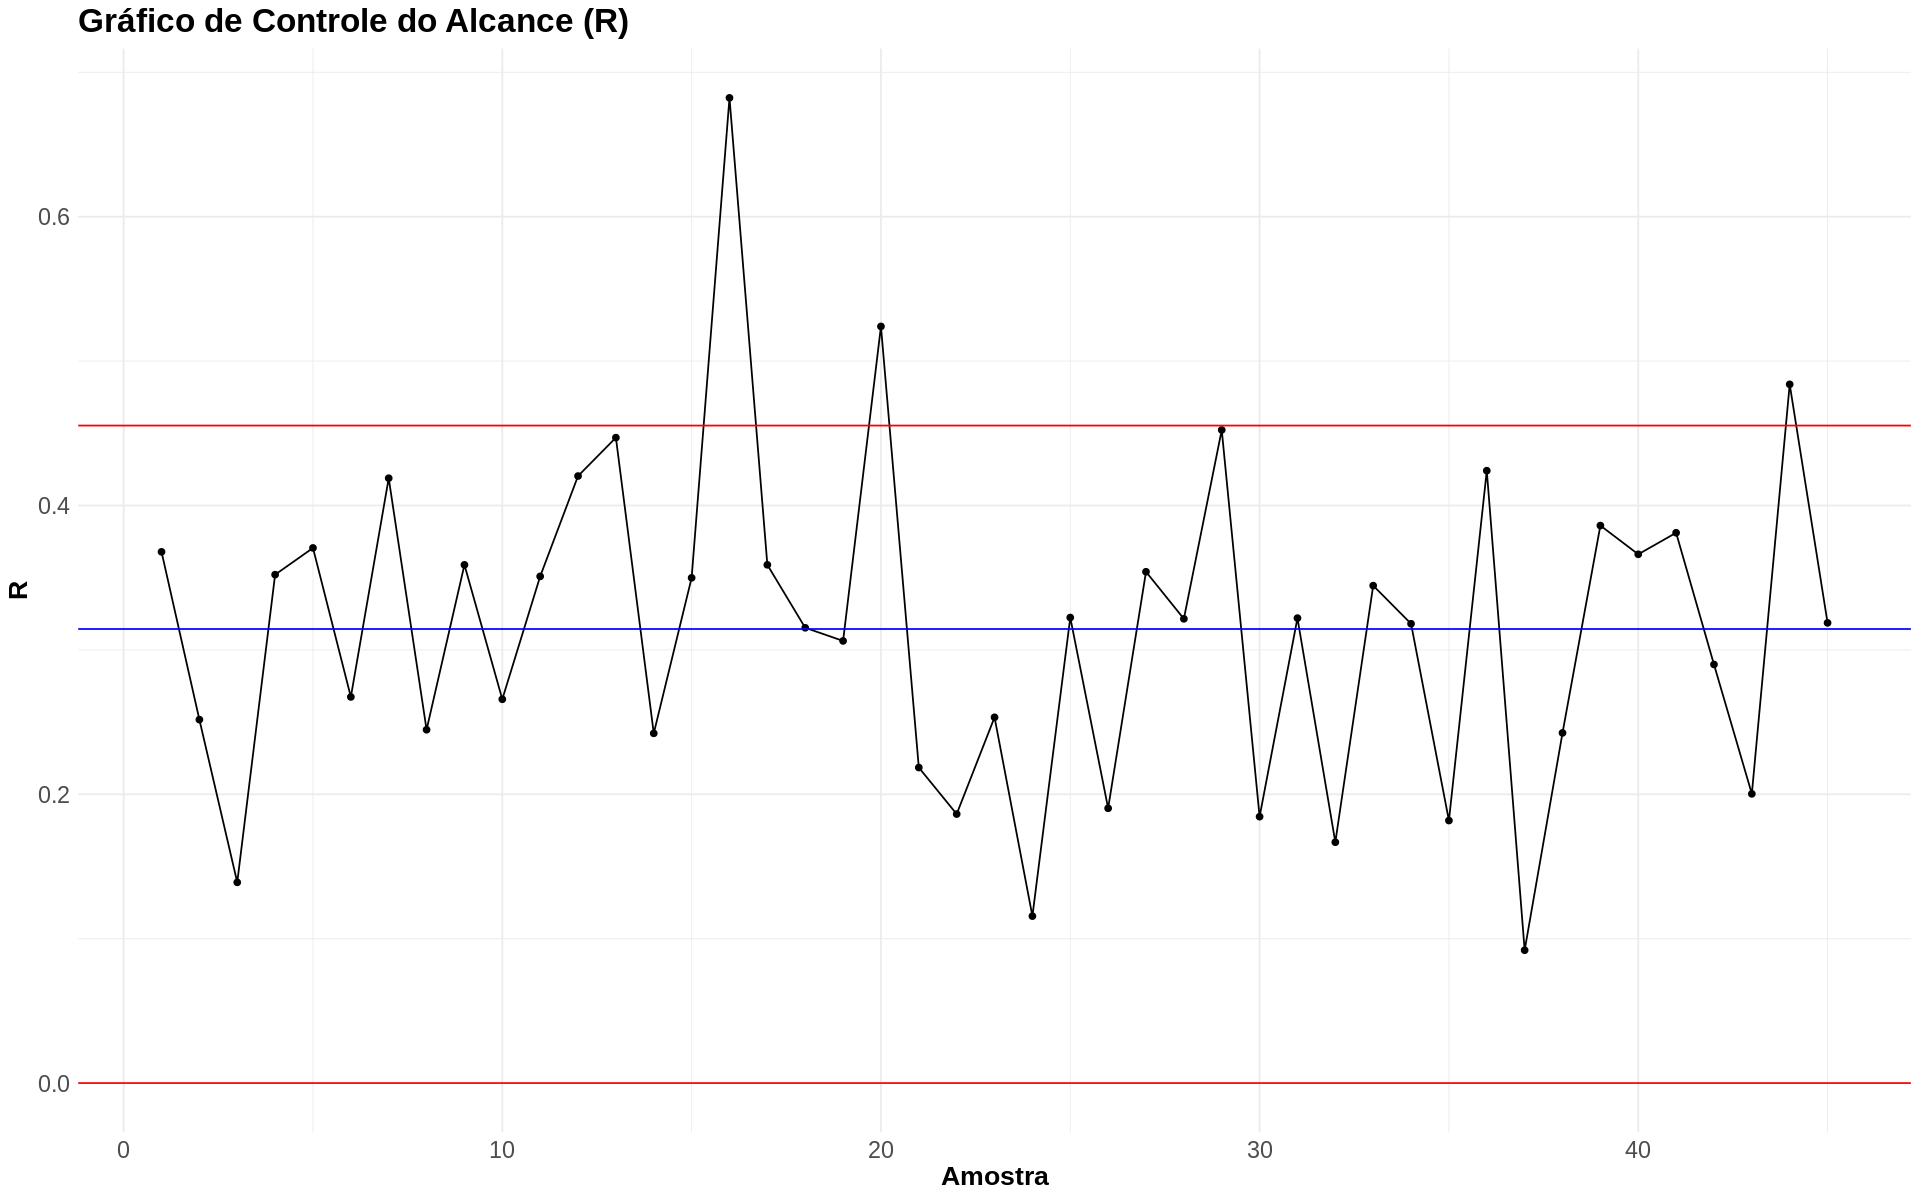

In [42]:
n <- length(dados)
A2 <- fatores$A2[fatores$n == n]
D3 <- fatores$D3[fatores$n == n]
D4 <- fatores$D4[fatores$n == n]

R_mean <- mean(dados$R)

UCL_R <- D4 * R_mean
LCL_R <- D3 * R_mean


options(repr.plot.width = 16, repr.plot.height = 10)  # Ajustando as dimensões do plot


ggplot(dados, aes(x = seq_along(R), y = R)) +
  geom_line() +
  geom_point() +
  geom_hline(yintercept = R_mean, linetype = "solid", color = "blue") +
  geom_hline(yintercept = UCL_R, linetype = "solid", color = "red") +
  geom_hline(yintercept = LCL_R, linetype = "solid", color = "red") +
  labs(title = "Gráfico de Controle do Alcance (R)", x = "Amostra", y = "R") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.title.x = element_text(size = 16, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14)
  )


# Ex 2

In [62]:
url <- "https://raw.githubusercontent.com/cibelerusso/Gestao-da-qualidade/refs/heads/main/Dados/Rolamentos.csv"
dados <- read.csv(url, sep=",")
colnames(dados) <- c("amostra", "numero_de_montagens_nao_conformes")

head(dados)

,amostra,numero_de_montagens_nao_conformes
,<int>,<int>
1,1,7
2,2,4
3,3,1
4,4,3
5,5,6
6,6,8


In [68]:
n <- 100  # n definido no enunciado

dados <- dados %>%
  mutate(frac_nao_conforme = numero_de_montagens_nao_conformes / n)

head(dados)

,amostra,numero_de_montagens_nao_conformes,frac_nao_conforme
,<int>,<int>,<dbl>
1,1,7,0.07
2,2,4,0.04
3,3,1,0.01
4,4,3,0.03
5,5,6,0.06
6,6,8,0.08


In [70]:
p_media <- mean(dados$frac_nao_conforme)

UCL <- p_media + 3 * sqrt((p_media * (1 - p_media)) / n)
LCL <- max(p_media - 3 * sqrt((p_media * (1 - p_media)) / n), 0)


print(paste("Media Proporcao nao conforme:", p_media))
print(paste("UCL = ", UCL))
print(paste("LCL = ", LCL))

[1] "Media Proporcao nao conforme: 0.0585"
[1] "UCL =  0.128905947902148"
[1] "LCL =  0"


In [71]:
dados <- dados %>%
  mutate(UCL = UCL, LCL = LCL)

head(dados)

,amostra,numero_de_montagens_nao_conformes,frac_nao_conforme,UCL,LCL
,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,7,0.07,0.1289059,0
2,2,4,0.04,0.1289059,0
3,3,1,0.01,0.1289059,0
4,4,3,0.03,0.1289059,0
5,5,6,0.06,0.1289059,0
6,6,8,0.08,0.1289059,0


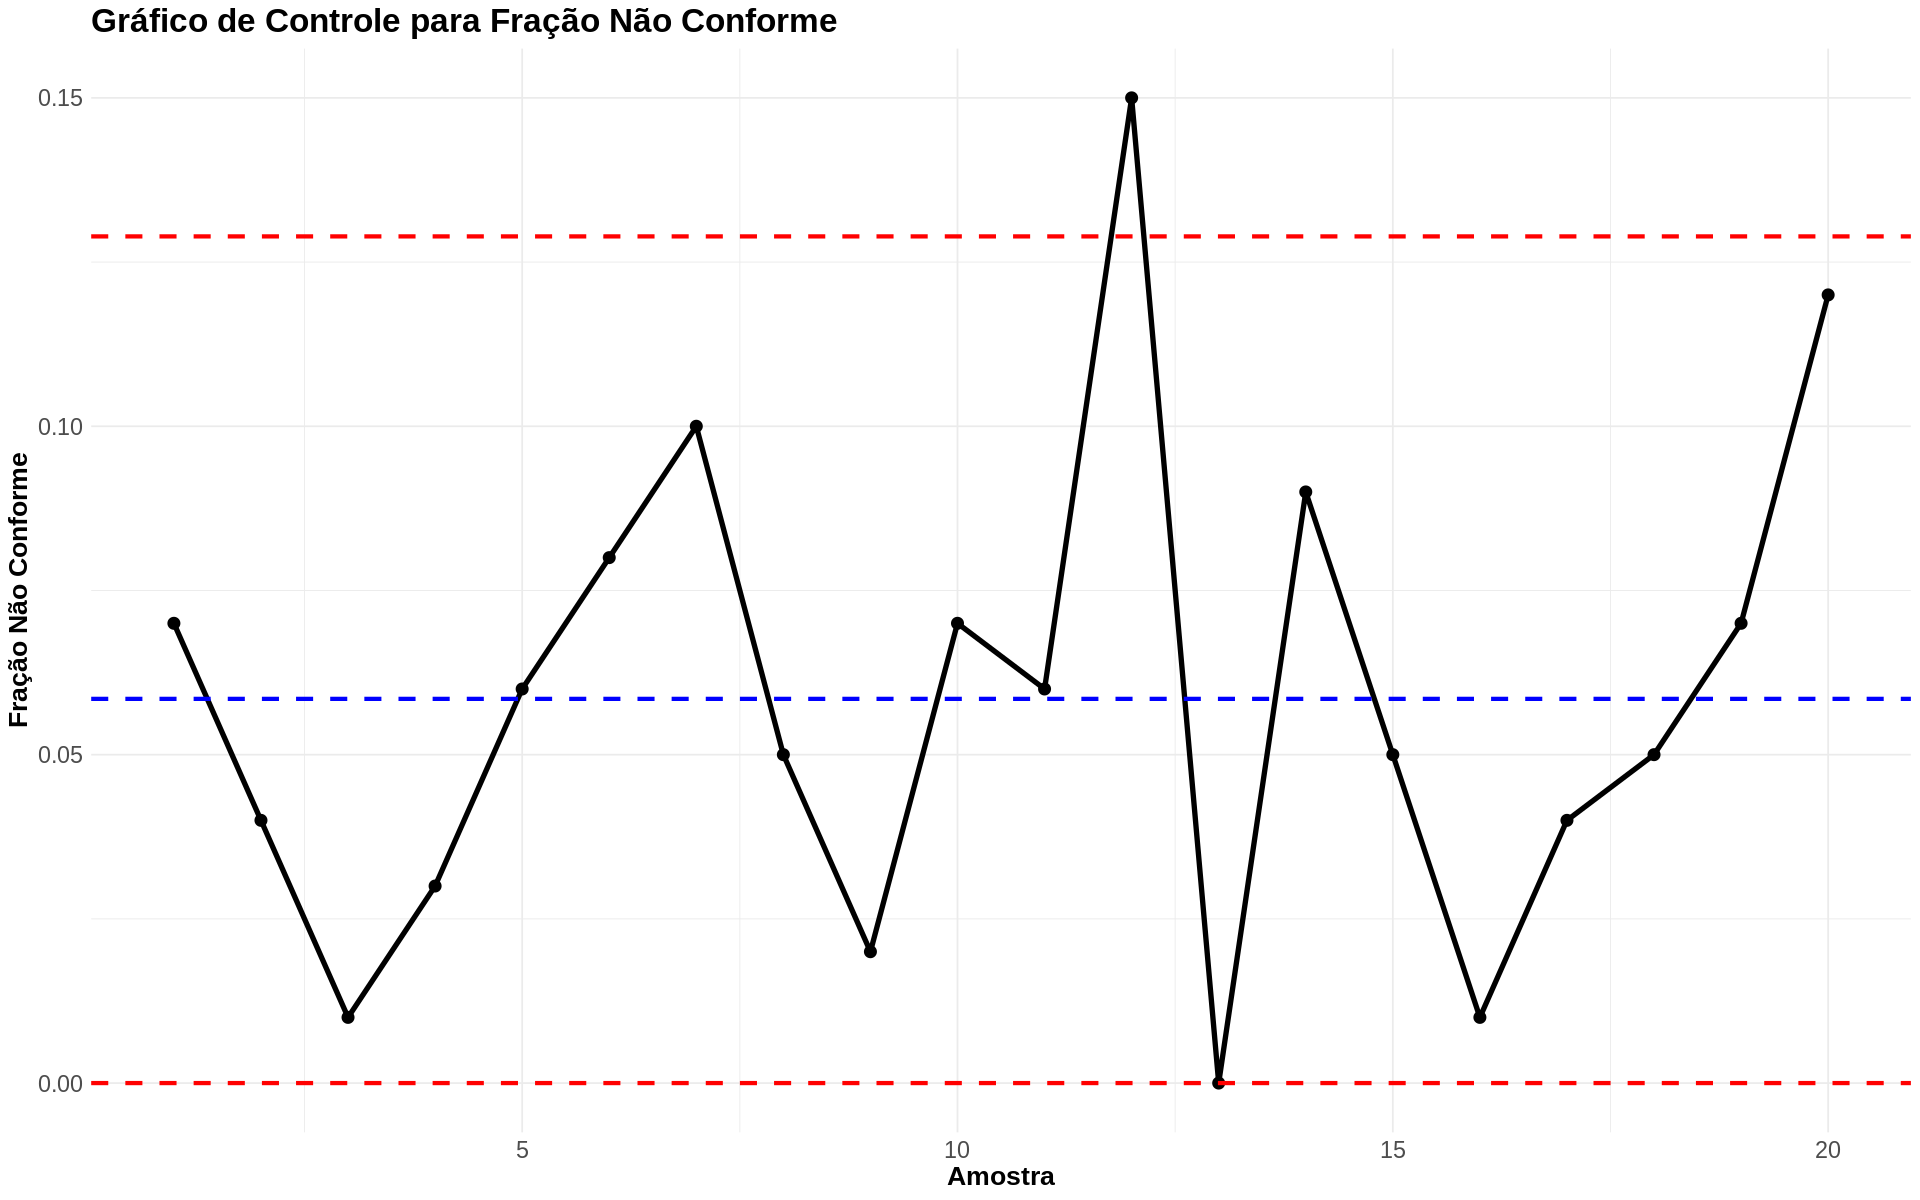

In [74]:

ggplot(dados, aes(x = amostra, y = frac_nao_conforme)) +
  geom_line(size = 1.5) +
  geom_point(size = 3) +
  geom_hline(yintercept = p_media, linetype = "dashed", color = "blue", size = 1.2) +
  geom_hline(yintercept = UCL, linetype = "dashed", color = "red", size = 1.2) +
  geom_hline(yintercept = LCL, linetype = "dashed", color = "red", size = 1.2) +
  labs(title = "Gráfico de Controle para Fração Não Conforme",
       x = "Amostra",
       y = "Fração Não Conforme") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.title.x = element_text(size = 16, face = "bold"),
        axis.title.y = element_text(size = 16, face = "bold"),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14))
